In [462]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots

#### 1.a- Generate a set of stimuli ui and rewards ri.

In [463]:
##Define parameters and variables
stimuli=[1]*50
reward=[1]*25

reward=reward+[0]*25  
trialN=list(range(1,51))
reward=np.array(reward)
stimuli=np.array(stimuli)
freeW=0 #free parameter


In [464]:
# plt.plot(trialN,reward,'o')
# plt.plot(trialN,stimuli,'o')
# sns.scatterplot(x=trialN,y=reward)
# sns.scatterplot(x=trialN,y=stimuli)
def stim_reward():
    fig = go.Figure()
    # Add random jitter to the x-coordinates
    jitter = np.random.uniform(low=-0.5, high=0.5, size=len(trialN))
    stimuli_jittered = trialN + jitter
    fig.add_trace(go.Scatter(x=trialN, y=reward, mode='markers', name='Reward'))
    fig.add_trace(go.Scatter(x=stimuli_jittered, y=stimuli, mode='markers', name='Stimuli'))
    fig.update_layout(title='Stimuli vs. Reward', xaxis_title='Trial Number', yaxis_title='Stimuli/Reward')
    fig.show()
stim_reward()

#### 1-b) Use the learning rule above to adapt w during the experiment. 
Choose the learning rate e = 0.1. Plot vi as a function of the trial.

In [465]:
e=0.1 #learning_rate
def reward_prediction(e=0.1):
    df=pd.DataFrame()
    df["trial"]=trialN
    df["reward"]=reward
    df["stimuli"]=stimuli
    pred=[]
    predError=[]
    freeW=[]
    for i in range(len(stimuli)):
        if len(freeW)==0:
            freeW.append(0)
        else:
            freeW.append(freeW[-1]+e*predError[-1]*stimuli[i])        
        pred.append(freeW[i]*stimuli[i])
        predError.append(reward[i]-pred[i])    
    df["predError"]=predError
    df["pred"]=pred
    df["freeW"]=freeW
    return df
df=reward_prediction()
df.head()

trial  reward  stimuli  predError    pred   freeW
0      1       1        1     1.0000  0.0000  0.0000
1      2       1        1     0.9000  0.1000  0.1000
2      3       1        1     0.8100  0.1900  0.1900
3      4       1        1     0.7290  0.2710  0.2710
4      5       1        1     0.6561  0.3439  0.3439

In [466]:
df=reward_prediction(e=e)
def plot_pred(df):
    fig=go.Figure()
    fig=px.scatter(df,y="pred",x="trial")
    fig.update_layout(title='Prediction with overshadowing', yaxis=dict(title="Predicted probability of reward"),  xaxis=dict(title="Trial"),)

    fig.show()

#### 1-c) Change the learning parameter e. What happens?


In [467]:
df=reward_prediction(e=0.1)
plot_pred(df)
df=reward_prediction(e=1)

plot_pred(df)

#ipywidgets.interact(plot_pred, e=(0.0,1.0))

In [468]:
fig = go.Figure()

for e in num_list:
    df=reward_prediction(e=e)
    trace1 = go.Scatter(
        x = df["trial"],
        y = df["pred"],
        name=f'learning rate={round(e,2)}',
        line=dict(width=2.5)
    )
    fig.add_trace(trace1)

fig.update_layout(
    xaxis_title="trial",
    yaxis_title="prediction"
)

fig.update_layout(
    xaxis_title="trial",
    yaxis_title="prediction",
    width=900,
    height=600
)
fig.update_layout(title='Prediction with overshadowing', yaxis=dict(title="Predicted probability of reward"),  xaxis=dict(title="Trial"),)


fig.show()

When we increase the learning rate (0.1->0.5) it prediction value shortly beomces 1 and stays flat(V->Prediction=1) as long as reward is present, then it sharply decreases to 0 as there are no any rewards. Furthermore when we select learning rate as 1 it instantly updates prediction to 1 and when reward is present, continous flat until reward is absent.Then wen reward is not present it direclty fallen down to 0.


#### 1-d) Partial conditioning. 
In each trial, the stimulus is present, but the presence of the reward is a random event with probability 0.4. Plot the presence/absence of the reward as a function of the trial index. Redo the simulation from (b). What happens?

In [469]:
##Define parameters and variables
stimuli=[1]*50
reward=[1]*20 # reward number is 20 as it is the 40% of trials
reward=reward+[0]*30  
import random
random.shuffle(reward)
reward
trialN=list(range(1,51))
reward=np.array(reward)
stimuli=np.array(stimuli)
freeW=0 #free parameter
stim_reward()

In [470]:
df2=reward_prediction(e=0.1)
plot_pred(df2)

We can see that prediction is still increasing but as the reward is randomly dropping out, we see that prediction is also drifting. When we increase the learning rate this drift effect is much stronger, and in case e=1, the prediction becomes either 1 or 0 throught trials.


#### 1-e) Blocking. 
Assume that there are two stimuli, u1 and u2, and two parameters, w1 and w2 to learn,
and that the animal’s prediction is given by v = w1u1 + w2u2. During the first 25 trials, only one
stimulus and the reward are present, during the next 25 trials, both stimuli and the reward are present.
What happens?

In [471]:
stimuli1 = [1] * 50
stimuli2 = [0] * 25 + [1] * 25
reward = [1] * 50
e=0.1 #learning_rate
def reward_prediction_doubleStim(e=0.1):
    df=pd.DataFrame()
    df["trial"]=trialN
    df["reward"]=reward
    df["stimuli"]=stimuli
    pred=[]
    predError=[]
    freeW1=[]
    freeW2=[]
    for i in range(len(stimuli)):
        if len(freeW1)==0:
            freeW1.append(0)
            freeW2.append(0)
        else:
            freeW1.append(freeW1[-1]+e*predError[-1]*stimuli1[i])        
            freeW2.append(freeW2[-1]+e*predError[-1]*stimuli2[i])        
        pred.append(freeW1[i]*stimuli1[i]+freeW2[i]*stimuli2[i])
        predError.append(reward[i]-pred[i])    
    df["predError"]=predError
    df["pred"]=pred
    df["freeW1"]=freeW1
    return df


In [472]:
df3=reward_prediction_doubleStim(e=0.1)
df3.head()
plot_pred(df3)

By introducing blocking, we can see that the animal learns to associate the reward with the first stimulus and ignores the second stimulus during the first 25 trials. When both stimuli are presented during the next 25 trials, the animal already has a strong association between the first stimulus and the reward, so it learns more slowly to associate the second stimulus with the reward. As a result, we see a smaller increase in the predicted reward for the second stimulus during the second half of the experiment.

#### 1-f) Overshadowing
 Assume again that there are two stimuli and two parameters to learn. However, now both stimuli are present from the beginning, as is the reward. What happens if one of the learning rates is larger (e.g. e = 0.2 for one stimulus vs. e = 0.1 for the other)?

In [473]:
stimuli1 = [1] * 50
stimuli2 = [1] * 50
reward = [1] * 50

def reward_prediction_overShadowing(e1=0.2,e2=0.1):
    df=pd.DataFrame()
    df["trial"]=trialN
    df["reward"]=reward
    df["stimuli"]=stimuli
    pred=[]
    predError=[]
    freeW1=[]
    freeW2=[]
    for i in range(len(stimuli)):
        if len(freeW1)==0:
            freeW1.append(0)
            freeW2.append(0)
        else:
            freeW1.append(freeW1[-1]+e1*predError[-1]*stimuli1[i])        
            freeW2.append(freeW2[-1]+e2*predError[-1]*stimuli2[i])        
        pred.append(freeW1[i]*stimuli1[i]+freeW2[i]*stimuli2[i])
        predError.append(reward[i]-pred[i])    
    df["predError"]=predError
    df["pred"]=pred
    df["freeW1"]=freeW1
    return df


In [474]:
df4=reward_prediction_overShadowing()
df4.head()
plot_pred(df4)

## PROBLEM 2 Simple decision strategy for flower sampling by bees.
We assume a bee is collecting nectar from yellow and blue flowers. During one day the bee can
sample 100 flowers. Let us observe its behavior during two days. During the first day, blue flowers
carry a reward of rb = 8, and yellow flowers a reward of ry = 2. During the second day, rewards are
reversed, so that rb = 2 and ry = 8.
We assume that in each trial the bee decides to land either on a blue or yellow flower. The bee
bases its decision on estimates of the nectar reward that it receives on blue or yellow flowers. Let
us denote the bee’s internal estimate of these nectar rewards as fireDown (blue flowers) and my (yellow
flowers). Then the bee will choose a blue flower with probability



Where does the name “exploitation-exploration trade-off” come from? Which refers to the trade-off between choosing actions that are known to be good (exploitation) versus exploring new actions to learn more about the environment (exploration).

### 2-a) Where does the name “exploitation-exploration trade-off” come from? 
Plot pb as a function (with Beta > 0) and fixed difference m_y - m_b then plot p_b as a function of m_y -m_b and fixed Beta. I am not giving you any values for the parameters, because you are supposed to gind interesting values yourself! (Note: the above decision-making strategy is sometimes called a “softmax”-strategy.)


In [475]:
def prob_b(m_y, m_b, Beta):
    probablity=1/(1+np.exp(Beta*(m_y-m_b)))
    return probablity

In [476]:
m_y = 8
m_b = 2
Beta_vals = np.linspace(0, 1, 100)

pb_vals = np.zeros(100)
pb_vals2 = np.zeros(100)
for i in range(100):
    pb_vals[i] = prob_b(m_y - m_b, 0, Beta_vals[i])
    pb_vals2[i] = prob_b(m_b-m_y, 0, Beta_vals[i])

#fig = go.Figure(data=[go.Scatter(x=Beta_vals, y=pb_vals,)])
fig = go.Figure()

trace1 = go.Scatter(
    x = Beta_vals,
    y = pb_vals,
    name="Probability of A"
)

trace2 = go.Scatter(
    x = Beta_vals,
    y = pb_vals2,
    name="Probability of B"
)

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(title='Probability of chosing Blue flower as a function of Beta with fixed (m_y - m_b)', yaxis=dict(title="Probability b"),  xaxis=dict(title="Beta"),)

fig.show()


Fixed Beta

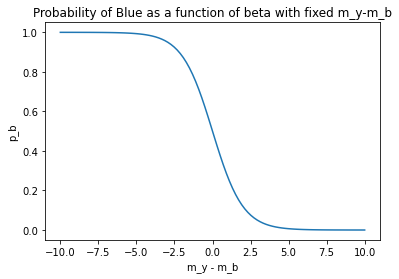

In [477]:
diff_range = np.linspace(-10, 10, 100) #m_y-m_b
Beta=1
prob_b_vals=[]

for i in diff_range:
        prob_b_vals.append(1/(1+np.exp(Beta*(i))))

plt.plot(diff_range,prob_b_vals)
plt.xlabel('m_y - m_b')
plt.ylabel('p_b')
plt.title('Probability of Blue as a function of beta with fixed m_y-m_b')
plt.show()

#### 2-b) Dumb bee. 
Using this decision-making strategy, generate a sequence of choices that a bee will
make during the two days described above. We assume that the bee is “dumb” and cannot learn from
experience. During both days, the bee thinks that yellow flowers carry a reward m_y = 5 and blue
flowers carry no reward, m_b = 0. Look at two different exploration-exploitation trade-offs: How does
the bee behave if Beta=0? How does it behave if Beta=0.8?
Programming Help: The difficulty here is to draw choices with probabilities determined by pb. The
trick is to resort to the function RAND (random.rand for numpy/scipy, rand for matlab). A number
drawn with this function is uniformly distributed within the interval [0, 1]. Use this number and turn
it into choice “blue” with probability pb or choice “yellow” with probability 1-p_b

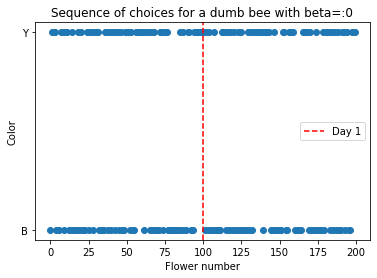

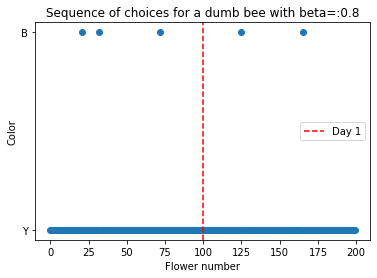

In [478]:
# set parameters
m_y = 5
m_b = 0

# How bee behave if Beta=0

def choose_color(m_y=5, m_b=0, Beta=0):
    probablity=prob_b(m_y,m_b,Beta)
    if np.random.rand() < probablity:
        return 'blue'
    else:
        return 'yellow'



# first day
beta = 0
choices1 = []
for i in range(100):
    if choose_color(Beta=beta) == 'blue':
        choices1.append("B")
    else:
        choices1.append("Y")

# second day
choices2 = []
for i in range(100):
    if choose_color(Beta=beta) == 'blue':
        choices2.append("B")
    else:
        choices2.append("Y")


plt.plot(choices1+choices2,'o')
plt.xlabel('Flower number')
plt.ylabel('Color')
plt.axvline(x=len(choices1), color='r', linestyle='--', label = 'Day 1')
plt.legend()
plt.title("Sequence of choices for a dumb bee with beta=:"+str(beta))

plt.show()

#beta
# first day
beta = 0.8
choices1 = []
for i in range(100):
    if choose_color(Beta=beta) == 'blue':
        choices1.append("B")
    else:
        choices1.append("Y")

# second day
choices2 = []
for i in range(100):
    if choose_color(Beta=beta) == 'blue':
        choices2.append("B")
    else:
        choices2.append("Y")

plt.plot(choices1+choices2,'o')
plt.xlabel('Flower number')
plt.ylabel('Color')
plt.axvline(x=len(choices1), color='r', linestyle='--', label = 'Day 1')
plt.title("Sequence of choices for a dumb bee with beta=:"+str(beta))
plt.legend()
plt.show()

# 2- C)Smart bee.
 Now let us assume that the bee is “smart” and that it can learn from its experiences.
Each time it visits a blue flower, it will update the estimated reward according to the online update
rule
m_b = m_b + e(r_b-m_b)
and similarly for a yellow flower,
m_y = m_y + e(r_y-m_y)
Given a learning parameter e = 0.2 and the initial assumptions about flower reward from above
(my = 5, fireDown = 0), simulate the bees sequence of choices during the two days. How do the reward
estimates change over time? Explore the case of purely explorative behavior (Beta=0). Explore the case of purely explorative behavior (Beta=1) What do you observe?


In [479]:
def prob_b(m_y, m_b, Beta):
    probablity=1/(1+np.exp(Beta*(m_y-m_b)))
    return probablity

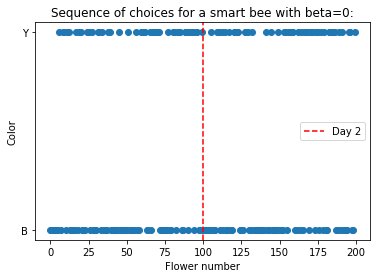

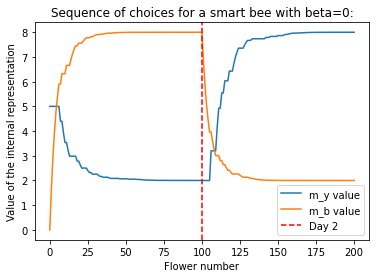

[112  88]


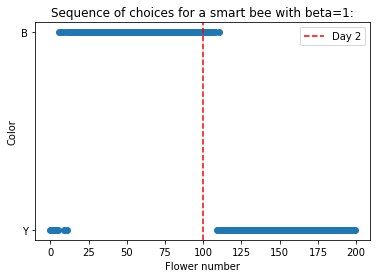

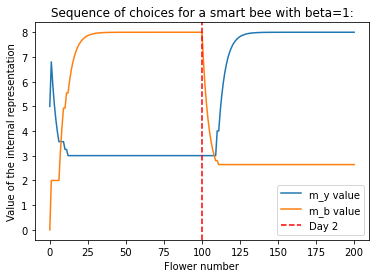

[102  98]


In [480]:

# set parameters
n_flowers=100
rb1 = 8
ry1 = 2
rb2 = 2
ry2 = 8
m_y = 5
m_b = 0
e=0.2

# m_y = m_y + e(r_y-m_y)
# m_b = m_b + e(r_b-m_b)

betas = [0, 1]

for beta in betas:
    m_b_list = [0]
    m_y_list = [5]
    ##day 1
    choices1=[]
    for i in range(n_flowers):
        if choose_color(m_y=m_y_list[-1], m_b=m_b, Beta=beta)=="blue":
            choices1.append("B")
            m_b = m_b + e*(rb1-m_b)
            m_y_list.append(m_y) #store the value
            m_b_list.append(m_b) #store the value
        else:
            choices1.append("Y")
            m_y = m_y + e*(ry1-m_y)
            m_y_list.append(m_y) #store the value
            m_b_list.append(m_b) #store the value
        
    ##day 2
    choices2=[]
    for i in range(n_flowers):
        if choose_color(m_y=m_y, m_b=m_b, Beta=beta)=="blue":
            choices2.append("B")
            m_b = m_b + e*(rb2-m_b)
            m_y_list.append(m_y) #store the value
            m_b_list.append(m_b) #store the value
        else:
            choices2.append("Y")
            m_y = m_y + e*(ry2-m_y)
            m_y_list.append(m_y) #store the value
            m_b_list.append(m_b) #store the value


    # Print sequence of choices
    plt.plot(choices1+choices2, 'o')
    plt.xlabel('Flower number')
    plt.ylabel('Color')
    plt.axvline(x=len(choices1), color='r', linestyle='--', label = 'Day 2')
    plt.legend()
    plt.title(f"Sequence of choices for a smart bee with beta={beta}:")

    plt.show()
    plt.plot(m_y_list, label = "m_y value")
    plt.plot(m_b_list, label = "m_b value")
    plt.xlabel('Flower number')
    plt.ylabel('Value of the internal representation')
    plt.axvline(x=len(choices1), color='r', linestyle='--', label = 'Day 2')
    plt.legend()
    plt.title(f"Sequence of choices for a smart bee with beta={beta}:")
    plt.show()
    print(np.unique(choices1+choices2, return_counts = True)[1]) 
            
        

    

# PROBLEM 3 The drift diffusion model of decision-making.
In a two-alternative forced choice task (2AFC-task), subjects are asked to choose between two alternative actions. We will here consider the case where a subject receives a visual motion stimulus (a
set of points on a screen that are moving in different directions) and then needs to indicate whether
the points were moving upwards or downwards. If such a motion stimulus is ambiguous or “noisy”,
the task can be quite difficult. We will assume that the motion stimulus continues until the subject
has made a choice. This scenario is well described by the “drift-diffusion-model”, in which the subject compares the firing rate fireUp of an upward-motion sensitive neuron with the firing rate fireDown of a
downward-motion sensitive neuron and integrates the difference between the two,
x˙ = fireUp -fireDown +sigma*n*(t)
where n*(t) is a noise term (Gaussian white noise with unit standard deviation) that simulates the
noisiness of real neurons. If the integration variable x surpasses a threshold µ, then the subject decides
for outcome A; if x decreases below a threshold -treshold , then the subject decides for outcome B. Any ordinary differential equation can be solved numerically using the Euler method, i.e., using
the approximation
x(t + Dt)= x(t)+x*Dt

For stochastic differential equations, i.e., those that have a noise-term, the random part grows with the
square root of the time step, a technical issue that you can ignore for now. It leads to the following
discrete approximation of the drift-diffusion-model:
x(t + Dt) =x(t) (fireUp-fireDown)*Dt+sigma*n*(t)*sqrt(Dt)


# 3-a)
Assume mA = 1 and mB = 0.95. Plot several runs of the drift-diffusion-model, always starting
with x(0) = 0. Choose a stepwidth of Dt=0.1ms, a noise level sigma=0.5ms to the power of (-1/2) and iterate euler method over 10000 time steps up to the time t=1s. You should chose a reasonable value for the treshold treshold.

In [599]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define parameters

dt = 1/10000
T = 1
n_steps = int(T/dt)
sigma = 0.5 #
fireUp = 1
fireDown = 0.95
treshold =  0.35 # Mu value

def sim_ddm(treshold=0.35,dt=1/10000,T=1,sigma=0.5,fireUp = 1,fireDown = 0.95):
    # open figure with subplots
    # add parameters
    n_steps = int(T/dt)
    noise_term = np.random.normal(0, 1, n_steps) # noise term
    x = np.zeros(n_steps)
    x[0] = 0
    # Simulate the model
    for i in range(1, n_steps):
        # Initialize arrays
        xi = x[i-1]
        xi += (fireUp-fireDown)*dt + sigma*noise_term[i]*np.sqrt(dt)
        x[i] = xi
        if xi >= treshold:
            x[i:] = treshold
            outcome="A"
            break
        elif xi <= -treshold:
            x[i:] = -treshold
            outcome="B"
            break
        if i==(n_steps-1):
            if xi>0: outcome="A"
            else: outcome="B"

    fig.add_trace(go.Scatter(x=np.arange(n_steps)*dt, y=x, mode='lines', opacity=0.5))

    timePointCrossTreshold=i
    return((timePointCrossTreshold*dt*1000)+100,outcome)

# Plot several runs of the model
#fig = make_subplots( shared_xaxes=True)
fig = make_subplots( shared_xaxes=True)
for i in range(10):
    sim_ddm(treshold=0.25)
fig.update_layout(title='Stimuli vs. Reward', xaxis_title='Time (s)', yaxis_title='Decision variable x')
fig.update_layout(height=400, width=600, title_text="Model simulation")
# fig.update_xaxes(title_text='Time (s)', row=2, col=1)
# fig.update_yaxes(title_text='Decision variable x', row=1, col=1)
fig.add_hline(y=0.25, line_dash="dash")
fig.add_hline(y=-0.25, line_dash="dash")
fig.show()






### 3-b)
 Run the model 1000 times and store the outcome (A vs. B) and the time of threshold crossing,
ti in each run. Assume that the reaction time of the subject is given by RTi = 100ms + ti. Plot the
distribution of reaction times for outcome A and the distribution for outcome B.

In [601]:
timesA=[]
timesB=[]
times=[]
outcomes=[]
for i in range(10000):
    time,outcome=sim_ddm(treshold=0.25)
    if outcome=="A":
        timesA.append(time)
    else: timesB.append(time)
    #outcomes.append(outcome)
# df_outcomes=pd.DataFrame()
# df_outcomes["outcomes"]=outcomes
# df_outcomes["times"]=times

fig = go.Figure()

outA = go.Histogram(
    x=timesA,
    name="Outcome A"
)

outB= go.Histogram(
    x=timesB,
    name="outcome B"
)

fig.add_trace(outA)
fig.add_trace(outB)
fig.update_layout(title='Stimuli vs. Reward', xaxis_title='Time (ms)', yaxis_title='Frequency')
fig.update_layout(height=400, width=600, title_text="Model simulation")
fig.show()


In [667]:
prob_A_sim=[]
#prob_A = np.sum(outcomes == 1) / num_trials
timesA=[]
timesB=[]
times=[]
outcomes=[]
num_trials=10
mE_values = np.linspace(-0.2, 0.2, 100)
prob_A_analytical=[]
for i in range(100):
    outcomes=[]
    timesA=[]
    timesB=[]
    times=[]
    for j in range(num_trials):
        mA=random.random()
        mB=mA+mE_values[i]
        t,outcome=sim_ddm(treshold=0.25,fireUp=mA,fireDown=mB,sigma=0.5)
        # Plot the probability of outcome A for different values of m_E
        m_E = fireUp - fireDown
        if outcome=="A":
            timesA.append(time)
            outcomes.append(outcome)
        else: timesB.append(time)
    Beta=2*0.25/(0.5**2)
    prob_A_sim.append(len(outcomes) / num_trials)
    prob_A_analytical.append(1 / (1 + np.exp(Beta * mE_values[i] )))


fig = go.Figure()
fig.add_trace(go.Scatter(x=mE_values, y=prob_A_sim, mode='lines', name='Simulation'))
fig.add_trace(go.Scatter(x=mE_values, y=prob_A_analytical, mode='lines', name='Analytical'))
fig.update_layout(title='Probability of choosing A for different values of m_E',
                   xaxis_title='mE',
                   yaxis_title='Probability of choosing A (p_A)')
fig.show()